## Polytope Climate-DT Feature Extraction Vertical Profile example notebook

This notebook shows how to use earthkit-data and earthkit-plots to pull destination-earth data from LUMI and plot it using earthkit-plots.


Before running the notebook you need to set up your credentials. See the main readme of this repository for different ways to do this or use the following cells to authenticate.

You will need to generate your credentials using the desp-authentication.py script.

This can be run as follows:

In [ ]:
%%capture cap
%run ../desp-authentication.py

This will generate a token that can then be used by earthkit and polytope.

In [ ]:
output_1 = cap.stdout.split('}\n')
access_token = output_1[-1][0:-1]

# Requirements
To run this notebook install the following:
* pip install earthkit-data
* pip install earthkit-plots
* pip install cf-units         (Optional for unit conversion in maps)

In [1]:
import earthkit.data
import earthkit.regrid

request = {
        "activity": "scenariomip",
        "class": "d1",
        "dataset": "climate-dt",
        "experiment": "ssp3-7.0",
        "generation": "1",
        "levtype": "pl",
        "date": "20210101",
        "model": "ifs-nemo",
        "expver": "0001",
        "param": "131",
        "realization": "1",
        "resolution": "high",
        "stream": "clte",
        "type": "fc",
        "time": "0000",
        "levelist": "1/to/1000",
        "feature": {
            "type": "verticalprofile",
            "points": [[38.9, -9.1]],
        },
    }

#data is an earthkit streaming object but with stream=False will download data immediately 
ds = earthkit.data.from_source("polytope", "destination-earth", request, stream=False, address='polytope.lumi.apps.dte.destination-earth.eu')


2025-06-10 09:42:08 - INFO - Key read from /home/maaw/.polytopeapirc
2025-06-10 09:42:08 - INFO - Sending request...
{'request': 'activity: scenariomip\n'
            'class: d1\n'
            'dataset: climate-dt\n'
            "date: '20210101'\n"
            'experiment: ssp3-7.0\n'
            "expver: '0001'\n"
            'feature:\n'
            '  points:\n'
            '  - - 38.9\n'
            '    - -9.1\n'
            '  type: verticalprofile\n'
            "generation: '1'\n"
            'levelist: 1/to/1000\n'
            'levtype: pl\n'
            'model: ifs-nemo\n'
            "param: '131'\n"
            "realization: '1'\n"
            'resolution: high\n'
            'stream: clte\n'
            "time: '0000'\n"
            'type: fc\n',
 'verb': 'retrieve'}
2025-06-10 09:42:08 - INFO - Polytope user key found in session cache for user maaw
2025-06-10 09:42:08 - INFO - Request accepted. Please poll ./c8b8f083-a0ce-4540-a17e-88d2c8c3a797 for status
2025-06-10 09:42

c8b8f083-a0ce-4540-a17e-88d2c8c3a797.covjson:   0%|          | 0.00/1.77k [00:00<?, ?B/s]

In [ ]:
ds._json()

In [2]:
# Convert data to xarray
ds.to_xarray()

[38.873582658567]
[350.9033203125]
[0]
['2021-01-01T00:00:00Z']
['2021-01-01T00:00:00Z']
[1, 5, 10, 20, 30, 50, 70, 100, 150, 200, 250, 300, 400, 500, 600, 700, 850, 925, 1000]
[[[32.509979248046875, -16.59982681274414, -2.306589126586914, 7.556833267211914, 7.42906379699707, 11.087087631225586, 17.68380355834961, 25.717838287353516, 36.24024200439453, 47.48233222961426, 36.124881744384766, 37.46219253540039, 33.19424057006836, 25.170822143554688, 23.056955337524414, 18.902206420898438, 9.0506591796875, 8.158443450927734, 4.304893493652344]]]


<xarray.Dataset> Size: 488B
Dimensions:    (latitude: 1, longitude: 1, number: 1, datetime: 1, time: 1,
                levelist: 19)
Coordinates:
  * latitude   (latitude) float64 8B 38.87
  * longitude  (longitude) float64 8B 350.9
  * number     (number) int64 8B 0
  * datetime   (datetime) <U20 80B '2021-01-01T00:00:00Z'
  * time       (time) <U20 80B '2021-01-01T00:00:00Z'
  * levelist   (levelist) int64 152B 1 5 10 20 30 50 ... 600 700 850 925 1000
Data variables:
    u          (latitude, longitude, number, datetime, time, levelist) float64 152B ...
Attributes: (12/15)
    activity:       scenariomip
    class:          d1
    dataset:        climate-dt
    Forecast date:  2021-01-01T00:00:00Z
    experiment:     ssp3-7.0
    expver:         0001
    ...             ...
    model:          ifs-nemo
    realization:    1
    resolution:     high
    stream:         clte
    type:           fc
    number:         0

[38.873582658567]
[350.9033203125]
[0]
['2021-01-01T00:00:00Z']
['2021-01-01T00:00:00Z']
[1, 5, 10, 20, 30, 50, 70, 100, 150, 200, 250, 300, 400, 500, 600, 700, 850, 925, 1000]
[[[32.509979248046875, -16.59982681274414, -2.306589126586914, 7.556833267211914, 7.42906379699707, 11.087087631225586, 17.68380355834961, 25.717838287353516, 36.24024200439453, 47.48233222961426, 36.124881744384766, 37.46219253540039, 33.19424057006836, 25.170822143554688, 23.056955337524414, 18.902206420898438, 9.0506591796875, 8.158443450927734, 4.304893493652344]]]
[38.873582658567]
[350.9033203125]
[0]
['2021-01-01T00:00:00Z']
['2021-01-01T00:00:00Z']
[1, 5, 10, 20, 30, 50, 70, 100, 150, 200, 250, 300, 400, 500, 600, 700, 850, 925, 1000]
[[[32.509979248046875, -16.59982681274414, -2.306589126586914, 7.556833267211914, 7.42906379699707, 11.087087631225586, 17.68380355834961, 25.717838287353516, 36.24024200439453, 47.48233222961426, 36.124881744384766, 37.46219253540039, 33.19424057006836, 25.170822143554688,

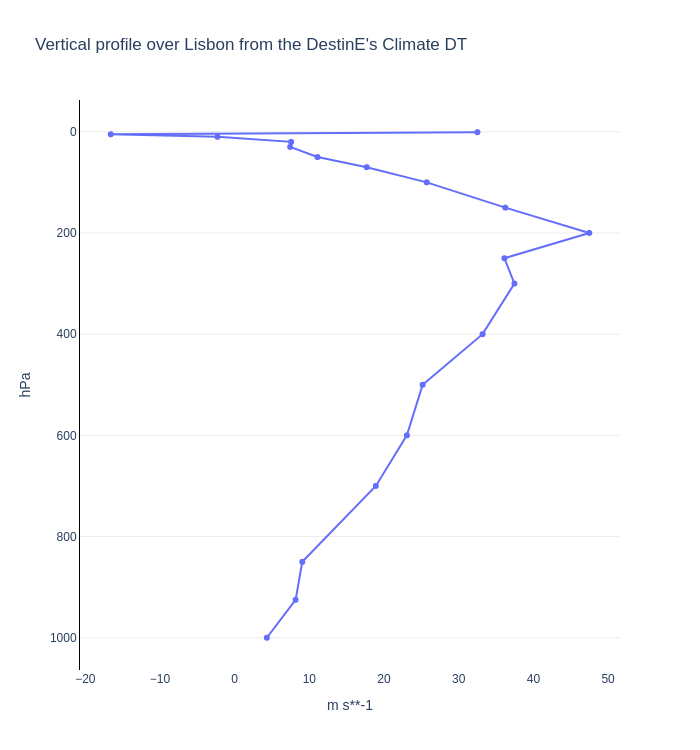

In [6]:
#da = ds.to_xarray()
from earthkit.plots.interactive import Chart
chart = Chart()
fig = chart.fig
fig['layout']['yaxis']['autorange'] = "reversed"
chart.line(ds, y="levelist")
chart.fig.update_layout(yaxis={"title": "hPa"})
chart.title("Vertical profile over Lisbon from the DestinE's Climate DT")
chart.show("png")